## NAMED ENTITY RECOGNITION IN SPACY 

In [1]:
# pip install -U spacy 
# python -m spacy download en_core_web_sm 
import spacy

In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 409.6 kB/s eta 0:00:32
      --------------------------------------- 0.2/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.3/12.8 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.6/12.8 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 0.7/12.8 MB 2.0 MB/s eta 0:00:06
     -- ------------------------------------- 0.9/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.1/12.8 MB 2.5 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 2.6 MB/s eta 0:00:05
     ---- ----------------------------------- 1.5/12.8 MB 2.8 MB/s eta 0:00:05
     ----- ---------------------------------- 1.6/12.8 MB 2.8 MB

In [3]:
# Load English tokenizer, tagger, parser and NER 
nlp = spacy.load("en_core_web_sm") 

In [4]:
# Process whole documents 
text = ("When Sebastian Thrun started working on self-driving cars at " 
        "Google in 2007, few people outside of the company took him " 
        "seriously. “I can tell you very senior CEOs of major American " 
        "car companies would shake my hand and turn away because I wasn’t " 
        "worth talking to,” said Thrun, in an interview with Recode earlier this week.") 
doc = nlp(text) 

In [5]:
# Analyze syntax 
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks]) 
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'talk', 'say']


In [6]:
# Find named entities, phrases and concepts 
for entity in doc.ents: 
    print(entity.text, entity.label_) 

Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun GPE
Recode ORG
earlier this week DATE


In [7]:
## EXERCISE 3.1

In [8]:
# Process whole documents 
text1 = ("When Sebastian Thrun started working on self-driving cars at " 
        "Google in 2007, few people outside of the company took him " 
        "seriously. “I can tell you very senior CEOs of major American " 
        "car companies would shake my hand and turn away because I wasn’t " 
        "worth talking to,” said Thrun, in an interview with Recode earlier this week.") 
doc = nlp(text1) 

In [9]:
text2 = ("In 2015, Kwame Mensah launched an AI startup in Accra to tackle transportation issues in "
         "Ghana, but few global investors paid attention, I remember pitching to firms in London and "
         "San Francisco—some wouldn’t even return my calls,\" said Mensah in a recent interview with TechCrunch.")
doc2 = nlp(text2)

In [10]:
text3 = ("When Ama Serwaa began researching clean energy solutions at the University of Ghana in 2010, "
         "the field was still underfunded and underappreciated. "
         "At international conferences, experts from Europe barely acknowledged my presentations,\" "
         "Serwaa shared with the BBC last month.")

In [11]:
text4 = ("Michael Addo joined Microsoft’s AI research team in 2018, shortly after completing his PhD in "
         "computer science at KNUST in Ghana. "
         "There weren't many Africans in the lab at the time, and some "
         "colleagues didn’t take my ideas seriously, \" Addo explained in a recent panel hosted by MIT.")
doc4 = nlp(text4)

In [12]:
text5 = ("In a bold move, Ghanaian entrepreneur Nana Adjei launched a drone delivery service for medical supplies "
         "in rural Ghana back in 2016. \"At first, government officials and NGOs thought it was a gimmick,\" said "
         "Adjei during a TED Talk held in Accra earlier this year.")
doc5 = nlp(text5)

### SPACY OUTPUT OF ALL THE NAME ENTITIES

In [13]:
# List of text paragraphs
texts = [text1, text2, text3, text4, text5]

# Process and analyze each text
for i, text in enumerate(texts, start=1):
    doc = nlp(text)
    
    print(f"\n--- Analysis for Paragraph {i} ---")
    
    # Noun phrases
    print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
    
    # Verbs
    print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])
    
    # Named entities
    print("Named Entities:")
    for entity in doc.ents:
        print(f"{entity.text} -> {entity.label_}")



--- Analysis for Paragraph 1 ---
Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'tell', 'shake', 'turn', 'talk', 'say']
Named Entities:
Sebastian Thrun -> PERSON
Google -> ORG
2007 -> DATE
American -> NORP
Thrun -> GPE
Recode -> ORG
earlier this week -> DATE

--- Analysis for Paragraph 2 ---
Noun phrases: ['Kwame Mensah', 'an AI startup', 'Accra', 'transportation issues', 'Ghana', 'few global investors', 'attention', 'I', 'firms', 'London', 'San Francisco', 'some', 'my calls', 'Mensah', 'a recent interview', 'TechCrunch']
Verbs: ['launch', 'tackle', 'pay', 'remember', 'pitch', 'return', 'say']
Named Entities:
2015 -> DATE
Kwame Mensah -> PERSON
AI -> GPE
Accra -> ORG
Ghana -> GPE
London -> GPE
San Francisco -> GPE
Mensah -> PERSON
TechCrunch -> ORG

--- Analysis for Paragraph 3

### Using NLTK LIBRARY
The Natural Language Toolkit (NLTK) is a widely used Python library for text processing and basic NLP tasks. One of its features is Named Entity Recognition (NER), which identifies proper nouns such as people, organizations, locations, and dates in text.

In [14]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree

# Download required NLTK models (only needed once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\x1 Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [15]:
texts = [text1, text2, text3, text4, text5]

# Function to extract named entities using NLTK
def extract_entities_nltk(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    tree = ne_chunk(pos_tags, binary=False)

    named_entities = []
    for subtree in tree:
        if isinstance(subtree, Tree):
            entity = " ".join([token for token, pos in subtree.leaves()])
            entity_type = subtree.label()
            named_entities.append((entity, entity_type))
    return named_entities

# Run NLTK NER for each text
for i, text in enumerate(texts, start=1):
    entities = extract_entities_nltk(text)
    print(f"\n--- Named Entities in Paragraph {i} (NLTK) ---")
    for ent_text, ent_type in entities:
        print(f"{ent_text} -> {ent_type}")
        


--- Named Entities in Paragraph 1 (NLTK) ---
Sebastian Thrun -> PERSON
Google -> ORGANIZATION
CEOs -> ORGANIZATION
American -> GPE
Thrun -> PERSON
Recode -> PERSON

--- Named Entities in Paragraph 2 (NLTK) ---
Kwame Mensah -> PERSON
Accra -> GPE
Ghana -> GPE
London -> GPE
San -> PERSON
Mensah -> PERSON
TechCrunch -> ORGANIZATION

--- Named Entities in Paragraph 3 (NLTK) ---
Ama Serwaa -> PERSON
University -> ORGANIZATION
Ghana -> GPE
Europe -> GPE
Serwaa -> PERSON
BBC -> ORGANIZATION

--- Named Entities in Paragraph 4 (NLTK) ---
Michael -> PERSON
Addo -> PERSON
Microsoft -> PERSON
PhD -> ORGANIZATION
KNUST -> ORGANIZATION
Ghana -> GPE
Addo -> PERSON
MIT -> ORGANIZATION

--- Named Entities in Paragraph 5 (NLTK) ---
Ghanaian -> GPE
Nana Adjei -> PERSON
NGOs -> ORGANIZATION
Adjei -> PERSON
TED Talk -> ORGANIZATION
Accra -> GPE


In [16]:
### EXERCISE 3.2 – TOWER OF BABEL

In [17]:
# Language detection using common word matching
def detect_language(user_input):
    # Dictionary of basic vocabulary for each supported language
    language_keywords = {
        'English': ['the', 'and', 'of', 'to', 'in', 'that', 'is', 'it', 'for', 'on'],
        'French': ['le', 'la', 'et', 'de', 'un', 'vous', 'pas', 'les', 'en', 'ne'],
        'Spanish': ['el', 'la', 'que', 'y', 'de', 'no', 'es', 'por', 'un', 'en'],
        'Portuguese': ['o', 'a', 'e', 'de', 'não', 'que', 'em', 'um', 'por', 'é'],
        'Welsh': ['yn', 'y', 'a', 'oedd', 'ei', 'ar', 'am', 'fel', 'bod', 'gyda'],
        'Twi': ['wo', 'me', 'yɛ', 'de', 'ɛyɛ', 'sɛ', 'nko', 'na', 'yɛn', 'no'],
        'Ewe': ['nye', 'mie', 'woe', 'na', 'gbe', 'dzɔ', 'eɖe', 'le', 'mava', 'mi'],
        'Ga': ['mi', 'ni', 'ɔɔ', 'yɛ', 'ke', 'nɔ', 'mli', 'wala', 'shika', 'la']
    }

    # Make everything lowercase and split into words
    input_words = user_input.lower().split()

    # Count how many common words match each language
    match_counts = {}
    for lang, keywords in language_keywords.items():
        matches = sum(word in input_words for word in keywords)
        match_counts[lang] = matches

    # Choose the language with the most keyword matches
    best_guess = max(match_counts, key=match_counts.get)

    return best_guess, match_counts


# Some real messages in different languages to test detection
test_messages = [
    "I hope the weather is good for our trip to the mountains.",
    "Je vous remercie pour votre soutien et votre patience.",
    "El coche está aparcado cerca del supermercado.",
    "O menino e a menina estão a brincar no parque.",
    "Roedd y plant yn hapus iawn yn yr ysgol heddiw.",
    "Meda wo akye. Yɛbɛhyia bio anɔpa yi.",  # Twi
    "Mie woe nye dzɔ le vɔnudrɔ me.",  # Ewe
    "Mi yɛ ni mli. Wɔɔ wala shika lɛ."  # Ga
]

# Go through each example and check which language it seems to be in
for idx, sentence in enumerate(test_messages, 1):
    detected_lang, all_scores = detect_language(sentence)
    print(f"Message {idx}:")
    print(f"Text: {sentence}")
    print(f"Identified Language: {detected_lang}")
    print(f"Word Matches: {all_scores}")
    print("-" * 55)


Message 1:
Text: I hope the weather is good for our trip to the mountains.
Identified Language: English
Word Matches: {'English': 4, 'French': 0, 'Spanish': 0, 'Portuguese': 0, 'Welsh': 0, 'Twi': 0, 'Ewe': 0, 'Ga': 0}
-------------------------------------------------------
Message 2:
Text: Je vous remercie pour votre soutien et votre patience.
Identified Language: French
Word Matches: {'English': 0, 'French': 2, 'Spanish': 0, 'Portuguese': 0, 'Welsh': 0, 'Twi': 0, 'Ewe': 0, 'Ga': 0}
-------------------------------------------------------
Message 3:
Text: El coche está aparcado cerca del supermercado.
Identified Language: Spanish
Word Matches: {'English': 0, 'French': 0, 'Spanish': 1, 'Portuguese': 0, 'Welsh': 0, 'Twi': 0, 'Ewe': 0, 'Ga': 0}
-------------------------------------------------------
Message 4:
Text: O menino e a menina estão a brincar no parque.
Identified Language: Portuguese
Word Matches: {'English': 0, 'French': 0, 'Spanish': 1, 'Portuguese': 3, 'Welsh': 1, 'Twi': 1, 'E

## EXERCISE 3.3 – EVALUATING YOUR TOWER OF BABEL

In [18]:
def detect_language(text):
    # Dictionary of common words for each language
    language_keywords = {
        'English': ['the', 'is', 'and', 'be', 'in', 'it', 'for', 'not', 'on', 'a'],
        'French': ['le', 'la', 'vous', 'merci', 'de', 'ne', 'pas', 'je', 'avec', 'du'],
        'Spanish': ['el', 'la', 'de', 'que', 'y', 'un', 'es', 'una', 'en', 'del'],
        'Portuguese': ['o', 'a', 'e', 'de', 'vai', 'no', 'com', 'em', 'estão', 'ela'],
        'Welsh': ['yn', 'y', 'a', 'ei', 'o', 'am', 'fel', 'gyda', 'bod', 'oedd'],
        'Twi': ['ɛyɛ', 'wo', 'me', 'yɛ', 'da', 'ase', 'meda', 'akye', 'bio', 'anɔpa'],
        'Ewe': ['mie', 'woe', 'nye', 'le', 'dzɔ', 'vɔnudrɔ', 'srɔ̃', 'míetsɔ', 'dɔwɔme', 'wò'],
        'Ga': ['mi', 'yɛ', 'ni', 'mli', 'shikpon', 'wala', 'nɔ', 'baa', 'wɔɔ', 'lɛ']
    }

    words = text.lower().split()
    scores = {}

    # Count matches for each language
    for lang, keywords in language_keywords.items():
        score = sum(word in words for word in keywords)
        scores[lang] = score

    predicted_lang = max(scores, key=scores.get)
    return predicted_lang, scores


# Test sentences with expected labels
test_sentences = [
    ("She is reading a book in the library.", "English"),
    ("Vous êtes très gentil, merci beaucoup.", "French"),
    ("La casa es grande y tiene un jardín bonito.", "Spanish"),
    ("Ela vai ao mercado comprar frutas frescas.", "Portuguese"),
    ("Mae’r haul yn tywynnu dros y bryniau heddiw.", "Welsh"),
    ("Wo ho te sɛn? Yɛda wo ase paa.", "Twi"),
    ("Wò nye míetsɔ srɔ̃ le dɔwɔme.", "Ewe"),
    ("Nɔ lɛ yɛ shikpon ni yɛ nɔ ni baa.", "Ga"),
    ("Le matin, je bois du café avec du pain.", "French"),
    ("He does not like the noise in the city.", "English")
]

# Output results
for i, (text, expected_lang) in enumerate(test_sentences, 1):
    predicted, matches = detect_language(text)
    status = "Correct" if predicted == expected_lang else "Incorrect"

    print(f"Sentence {i}:")
    print(f"Text: {text}")
    print(f"Predicted Language: {predicted}")
    print(f"Word Matches: {matches}")
    print(f"Status: {status}")
    print()


Sentence 1:
Text: She is reading a book in the library.
Predicted Language: English
Word Matches: {'English': 4, 'French': 0, 'Spanish': 0, 'Portuguese': 1, 'Welsh': 1, 'Twi': 0, 'Ewe': 0, 'Ga': 0}
Status: Correct

Sentence 2:
Text: Vous êtes très gentil, merci beaucoup.
Predicted Language: French
Word Matches: {'English': 0, 'French': 2, 'Spanish': 0, 'Portuguese': 0, 'Welsh': 0, 'Twi': 0, 'Ewe': 0, 'Ga': 0}
Status: Correct

Sentence 3:
Text: La casa es grande y tiene un jardín bonito.
Predicted Language: Spanish
Word Matches: {'English': 0, 'French': 1, 'Spanish': 4, 'Portuguese': 0, 'Welsh': 1, 'Twi': 0, 'Ewe': 0, 'Ga': 0}
Status: Correct

Sentence 4:
Text: Ela vai ao mercado comprar frutas frescas.
Predicted Language: Portuguese
Word Matches: {'English': 0, 'French': 0, 'Spanish': 0, 'Portuguese': 2, 'Welsh': 0, 'Twi': 0, 'Ewe': 0, 'Ga': 0}
Status: Correct

Sentence 5:
Text: Mae’r haul yn tywynnu dros y bryniau heddiw.
Predicted Language: Welsh
Word Matches: {'English': 0, 'French'

## EXERCISE 3.4 – CONFUSION MATRIX 

### Step 1 - Import libraries and load dataset 

In [19]:
# import libraries 
import pandas as pd 
import nltk 

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 

In [20]:
## NLTK corpus (a collection of linguistic data) 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
# need to download nltk corpus first (one time only) 
# 
nltk.download('all') 

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\x1
[nltk_data]    |     Carbon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\x1
[nltk_data]    |     Carbon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\x1 Carbon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\x1 Carbon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\x1 Carbon\AppData\Ro

True

In [23]:
# Load the amazon review dataset (using sample in Blackboard) 
df = pd.read_csv ('amazon.csv') 
df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
993,This app is powerful and easy to use. I use it...,1
994,"Great, life-changing app. Love its customizab...",1
995,Bleh,0
996,The concept of this alarm clock is very very s...,1


###### Step 2 - Preprocess text 

In [24]:
# create preprocess_text function                                                                                        
def preprocess_text(text): 
    # Tokenize the text                                                                                                  
    tokens = word_tokenize(text.lower()) 
 
    # Remove stop words                                                                                                  
    filtered_tokens = [token for token in tokens if token not in 
stopwords.words('english')] 
 
    # Lemmatize the tokens                                                                                               
    lemmatizer = WordNetLemmatizer() 
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens] 
 
    # Join the tokens back into a string                                                                                 
    processed_text = ' '.join(lemmatized_tokens) 
 
    return processed_text 
 
# apply the function df                                                                                                   
df['reviewText'] = df['reviewText'].apply(preprocess_text) 
df 
 

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1
...,...,...
993,app powerful easy use . use primary alarm cloc...,1
994,"great , life-changing app . love customizabili...",1
995,bleh,0
996,concept alarm clock simple . also effective . ...,1


### Step 3 - NLTK Sentiment Analyzer

In [25]:
#### First, we’ll initialize a Sentiment Intensity Analyzer object from the 
nltk.sentiment.vader #library

<module 'nltk.sentiment.vader' from 'C:\\Users\\x1 Carbon\\AppData\\Roaming\\Python\\Python311\\site-packages\\nltk\\sentiment\\vader.py'>

In [26]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
# initialize NLTK sentiment analyzer                                                                                      
analyzer = SentimentIntensityAnalyzer() 
# create get_sentiment function   

def get_sentiment(text):
    scores = analyzer.polarity_scores(text) 
    sentiment = 1 if scores['pos'] > 0 else 0 
    return sentiment 
# apply get_sentiment function                                                                                            
df['sentiment'] = df['reviewText'].apply(get_sentiment) 
print (df)

                                            reviewText  Positive  sentiment
0    one best apps acording bunch people agree bomb...         1          1
1    pretty good version game free . lot different ...         1          1
2    really cool game . bunch level find golden egg...         1          1
3    silly game frustrating , lot fun definitely re...         1          1
4    terrific game pad . hr fun . grandkids love . ...         1          1
..                                                 ...       ...        ...
993  app powerful easy use . use primary alarm cloc...         1          1
994  great , life-changing app . love customizabili...         1          1
995                                               bleh         0          0
996  concept alarm clock simple . also effective . ...         1          1
997  many people commenting permission anyone even ...         0          0

[998 rows x 3 columns]


In [28]:
# Start codiimport pandas as pd
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# download nltk corpus
import nltk
nltk.download('all')

# Load the amazon review dataset
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\x1
[nltk_data]    |     Carbon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\x1
[nltk_data]    |     Carbon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\x1 Carbon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\x1 Carbon\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\x1 Carbon\AppData\Ro

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [29]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

df['reviewText'] = df['reviewText'].apply(preprocess_text)
df.head()

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1


In [30]:
# Perform sentiment analysis using NLTK Vader
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = 1 if scores['pos'] > 0 else 0
    return sentiment

df['sentiment'] = df['reviewText'].apply(get_sentiment)
df.head()

,reviewText,Positive,sentiment
0,one best apps acording bunch people agree bomb...,1,1
1,pretty good version game free . lot different ...,1,1
2,really cool game . bunch level find golden egg...,1,1
3,"silly game frustrating , lot fun definitely re...",1,1
4,terrific game pad . hr fun . grandkids love . ...,1,1


In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['Positive'], df['sentiment']))

[[ 1131  3636]
 [  576 14657]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(df['Positive'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



In [33]:
#### 3.6

In [34]:
sample1 = df_full.sample(n=1000, random_state=42)
sample1['sentiment'] = sample1['reviewText'].apply(get_sentiment)

print("Sample 1 Results:")
print(confusion_matrix(sample1['Positive'], sample1['sentiment']))
print(classification_report(sample1['Positive'], sample1['sentiment']))

NameError: name 'df_full' is not defined

In [35]:
#### SAMPLE 

In [36]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix, classification_report

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Load full Amazon review dataset
df = pd.read_csv("https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv")

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered = [t for t in tokens if t not in stopwords.words("english")]
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token) for token in filtered]
    return " ".join(lemmatized)

# Apply preprocessing
df["reviewText"] = df["reviewText"].apply(preprocess_text)

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Sentiment classification function
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return 1 if score['pos'] > 0 else 0


[nltk_data] Downloading package punkt to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\x1
[nltk_data]     Carbon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
# Sample 1
sample1 = df.sample(n=1000, random_state=42)
sample1["sentiment"] = sample1["reviewText"].apply(get_sentiment)
print("Sample 1 Results:")
print(confusion_matrix(sample1["Positive"], sample1["sentiment"]))
print(classification_report(sample1["Positive"], sample1["sentiment"]))


Sample 1 Results:
[[ 70 162]
 [ 30 738]]
              precision    recall  f1-score   support

           0       0.70      0.30      0.42       232
           1       0.82      0.96      0.88       768

    accuracy                           0.81      1000
   macro avg       0.76      0.63      0.65      1000
weighted avg       0.79      0.81      0.78      1000



In [38]:
# Sample 2
sample2 = df.sample(n=1000, random_state=99)
sample2["sentiment"] = sample2["reviewText"].apply(get_sentiment)
print("\nSample 2 Results:")
print(confusion_matrix(sample2["Positive"], sample2["sentiment"]))
print(classification_report(sample2["Positive"], sample2["sentiment"]))


Sample 2 Results:
[[ 59 174]
 [ 32 735]]
              precision    recall  f1-score   support

           0       0.65      0.25      0.36       233
           1       0.81      0.96      0.88       767

    accuracy                           0.79      1000
   macro avg       0.73      0.61      0.62      1000
weighted avg       0.77      0.79      0.76      1000



In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Negative (0)', 'Positive (1)']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Sample 1 Results:
[[ 70 162]
 [ 30 738]]
              precision    recall  f1-score   support

           0       0.70      0.30      0.42       232
           1       0.82      0.96      0.88       768

    accuracy                           0.81      1000
   macro avg       0.76      0.63      0.65      1000
weighted avg       0.79      0.81      0.78      1000



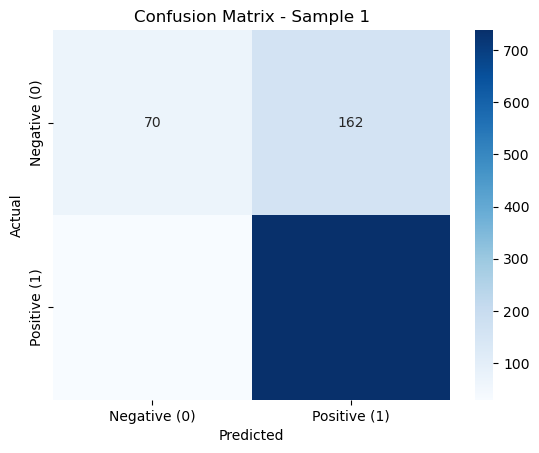

In [42]:
# Sample 1
sample1 = df.sample(n=1000, random_state=42)
sample1["sentiment"] = sample1["reviewText"].apply(get_sentiment)
print("Sample 1 Results:")
print(confusion_matrix(sample1["Positive"], sample1["sentiment"]))
print(classification_report(sample1["Positive"], sample1["sentiment"]))
plot_confusion_matrix(sample1["Positive"], sample1["sentiment"], "Confusion Matrix - Sample 1")



Sample 2 Results:
[[ 59 174]
 [ 32 735]]
              precision    recall  f1-score   support

           0       0.65      0.25      0.36       233
           1       0.81      0.96      0.88       767

    accuracy                           0.79      1000
   macro avg       0.73      0.61      0.62      1000
weighted avg       0.77      0.79      0.76      1000



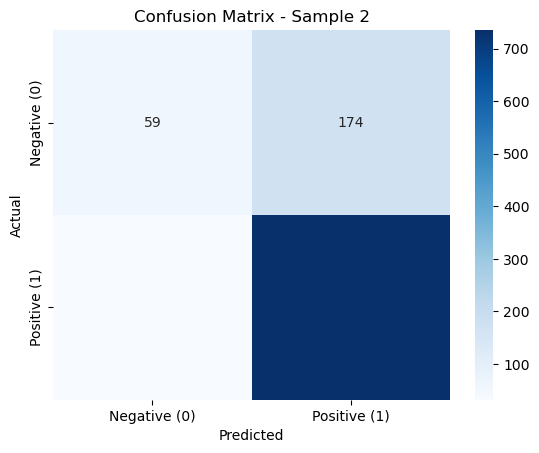

In [43]:
#
sample2 = df.sample(n=1000, random_state=99)
sample2["sentiment"] = sample2["reviewText"].apply(get_sentiment)
print("\nSample 2 Results:")
print(confusion_matrix(sample2["Positive"], sample2["sentiment"]))
print(classification_report(sample2["Positive"], sample2["sentiment"]))
plot_confusion_matrix(sample2["Positive"], sample2["sentiment"], "Confusion Matrix - Sample 2")